## Homework 5 Coding Exercises

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### a).

We simulate the system of differential equations for the BCM rule when $\eta=1$ and $T_s=1$. We will repeat the pattern presentations (alternating between them) 10 times each for a total of 20 presentations.

In [17]:
eta = 1
v_theta = 2

#In order of u1, u2
pat = [[3, 0], [0, 1]]

#Forward Euler
numtrials = 20 #Total trials
Ts = 1 #Total runtime
dt = 0.001 #Time step
nt = int(Ts/dt)

w1 = np.zeros(nt*numtrials)
w2 = np.zeros(nt*numtrials)
tvec = np.linspace(0,numtrials,nt*numtrials)

#Initial conditions
w1[0] = 1
w2[0] = 1

z=0
for i in range(numtrials):
    k = i%2 #First or second pattern
    
    if i == numtrials-1:
        z = 1
    
    for j in range(nt-z):
        idx = j + nt*i
        v = w1[idx]*pat[k][0] + w2[idx]*pat[k][1]

        w1[idx+1] = w1[idx] + dt*(eta*v*(v - v_theta)*pat[k][0])
        w2[idx+1] = w2[idx] + dt*(eta*v*(v - v_theta)*pat[k][1])

        w1[idx+1] = np.minimum(w1[idx+1], 10)
        w2[idx+1] = np.minimum(w2[idx+1], 10)

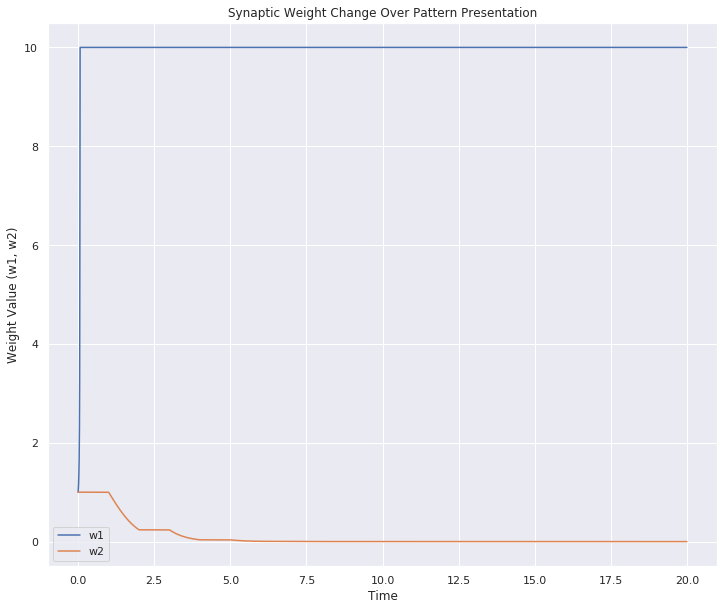

In [18]:
#Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

ax.plot(tvec, w1)
ax.plot(tvec, w2)

ax.set_xlabel('Time')
ax.set_ylabel('Weight Value (w1, w2)')
ax.set_title('Synaptic Weight Change Over Pattern Presentation')
ax.legend(['w1','w2']);

In the plots above we see that $w_1$ immediately shoots up to the maximum value of 10 while $w_2$ drops down to the hard lower bound of zero. This is exactly what we expect from the analysis in problem 2a).

### b).

Next, we simulate our BCM rule when $\eta=1=\Delta t$. This time we consider only one input pattern.

In [19]:
eta = 1
v_theta = 2

#In order of u1, u2
pat = [[3, 0], [0, 2.5]]

#Forward Euler
numtrials = 20 #Total trials
Ts = 1 #Total runtime
dt = 0.001 #Time step
nt = int(Ts/dt)

w1 = np.zeros(nt*numtrials)
w2 = np.zeros(nt*numtrials)
tvec = np.linspace(0,numtrials,nt*numtrials)

#Initial conditions
w1[0] = 1
w2[0] = 1

z=0
for i in range(numtrials):
    k = i%2 #First or second pattern
    
    if i==numtrials-1:
        z=1
    
    for j in range(nt-z):
        idx = j + nt*i
        v = w1[idx]*pat[k][0] + w2[idx]*pat[k][1]

        w1[idx+1] = w1[idx] + dt*(eta*v*(v - v_theta)*pat[k][0])
        w2[idx+1] = w2[idx] + dt*(eta*v*(v - v_theta)*pat[k][1])

        w1[idx+1] = np.minimum(w1[idx+1], 10)
        w2[idx+1] = np.minimum(w2[idx+1], 10)

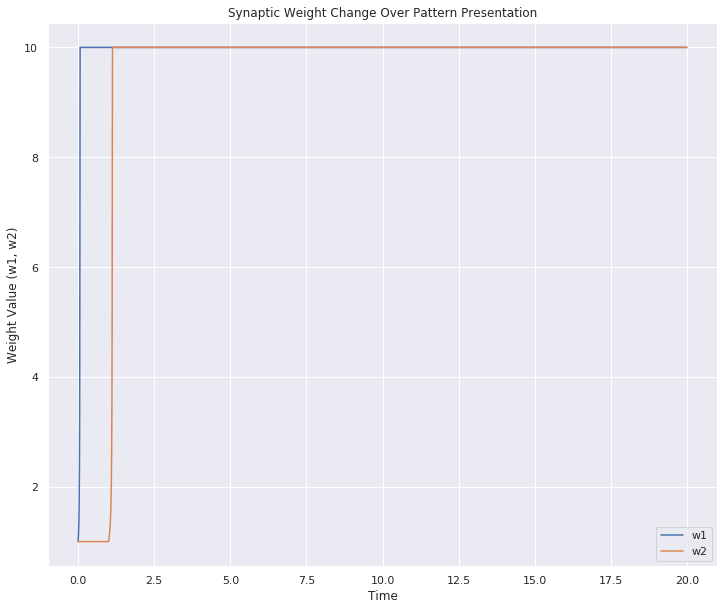

In [20]:
#Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,10))

ax.plot(tvec, w1)
ax.plot(tvec, w2)

ax.set_xlabel('Time')
ax.set_ylabel('Weight Value (w1, w2)')
ax.set_title('Synaptic Weight Change Over Pattern Presentation')
ax.legend(['w1','w2']);

Again we can confirm a match between the plot above with our predictions from problem 2b). We see in the plots that $w_1$ and $w_2$ both shoot up to the maximum value of 10 fairly quickly. However, we see that $w_1$ does so quicker than $w_2$ which is what was determined in the analysis.

### c).

Finally, we again simulate our BCM rule with a dynamic threshold. We pick values of $u_1$ that exhibit different qualitative stability behaviors.

In [48]:
eta = 1
u1 = [0.9, 1, 1.1, 1.3]

#Forward Euler
T = 1000 #Total runtime
dt = 0.001 #Time step
nt = int(T/dt)

w1 = np.zeros((4,nt))
v_theta = np.zeros((4,nt))
tvec = np.linspace(0,T,nt)


#Initial conditions
for i in range(4):
    w1[i][0] = 0.1
    v_theta[i][0] = 0.1

for i in range(len(u1)):
    for j in range(nt-1):
        v = w1[i][j]*u1[i]

        w1[i][j+1] = w1[i][j] + dt*(eta*v*(v - v_theta[i][j])*u1[i])
        v_theta[i][j+1] = v_theta[i][j] + dt*(v**2 - v_theta[i][j])
    

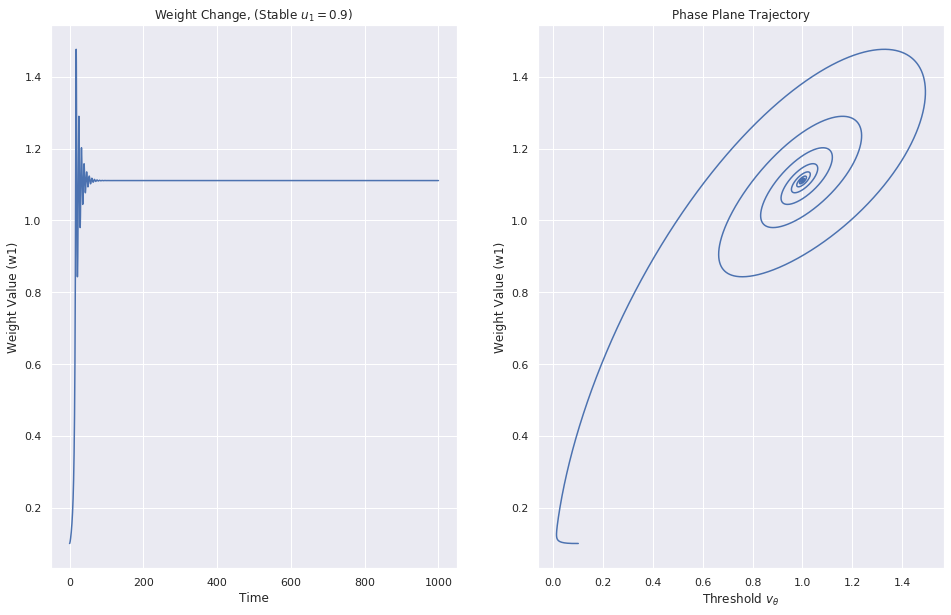

In [57]:
#Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

ax[0].plot(tvec, w1[0])
ax[1].plot(v_theta[0], w1[0])

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Weight Value (w1)')
ax[0].set_title('Weight Change, (Stable $u_1=0.9$)')

ax[1].set_xlabel(r'Threshold $v_{\theta}$')
ax[1].set_ylabel('Weight Value (w1)')
ax[1].set_title('Phase Plane Trajectory');

In the plots above we see the weight change for $w_1$ and the phase plane plotted when $u_1=0.9$. This value is in the qualitatively stable range and we see this confirmed in the plots -- $w_1$ eventually settles into the fixed point at $\frac{1}{u_1}=\frac{1}{0.9}=1.11$.

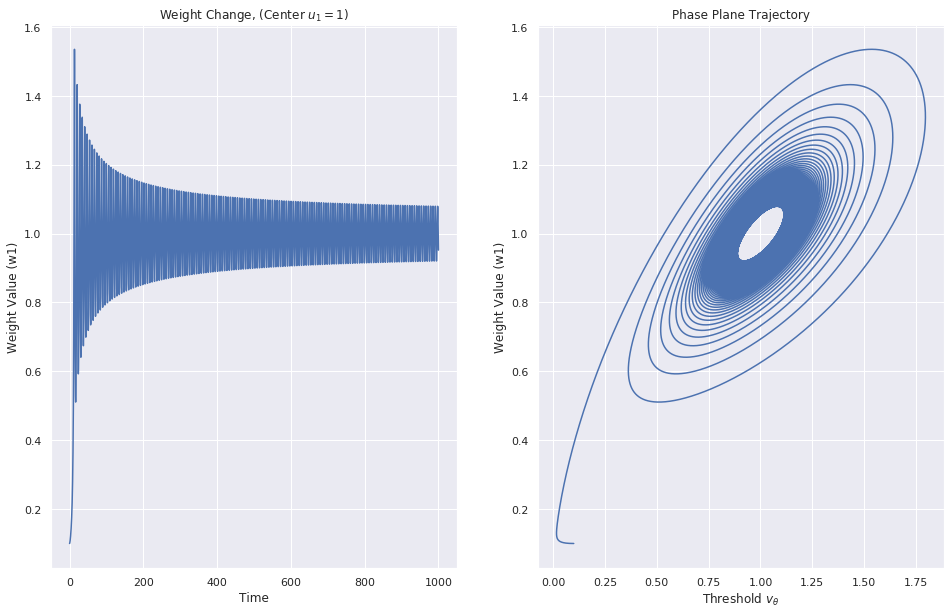

In [58]:
#Plotting
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

ax[0].plot(tvec, w1[1])
ax[1].plot(v_theta[1], w1[1])

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Weight Value (w1)')
ax[0].set_title('Weight Change, (Center $u_1=1$)')

ax[1].set_xlabel(r'Threshold $v_{\theta}$')
ax[1].set_ylabel('Weight Value (w1)')
ax[1].set_title('Phase Plane Trajectory');

Again we see the same set of plots except $u_1=1$ which is neither stable or unstable (i.e a center). This is validated by the plots where we see a limit cycle begin around the point (1,1) which is what is expected from the analysis.

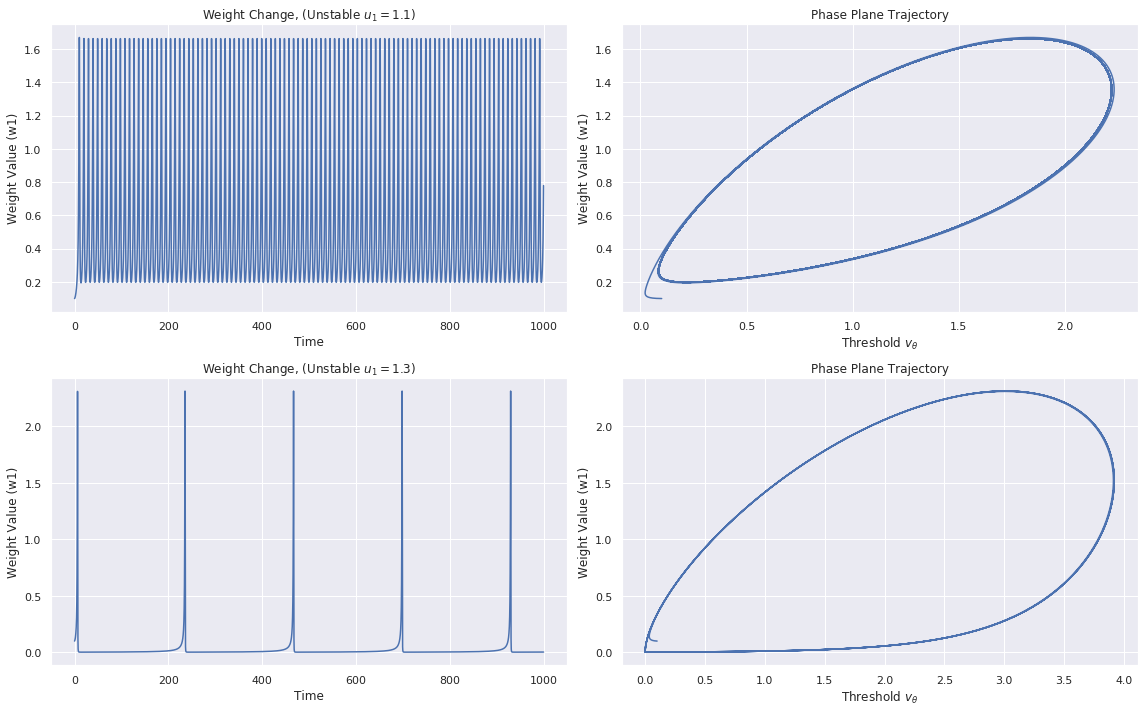

In [60]:
#Plotting
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

ax[0][0].plot(tvec, w1[2]);
ax[0][1].plot(v_theta[2], w1[2]);

ax[0][0].set_xlabel('Time')
ax[0][0].set_ylabel('Weight Value (w1)')
ax[0][0].set_title('Weight Change, (Unstable $u_1=1.1$)')

ax[0][1].set_xlabel(r'Threshold $v_{\theta}$')
ax[0][1].set_ylabel('Weight Value (w1)')
ax[0][1].set_title('Phase Plane Trajectory');


ax[1][0].plot(tvec, w1[3]);
ax[1][1].plot(v_theta[3], w1[3]);

ax[1][0].set_xlabel('Time')
ax[1][0].set_ylabel('Weight Value (w1)')
ax[1][0].set_title('Weight Change, (Unstable $u_1=1.3$)')

ax[1][1].set_xlabel(r'Threshold $v_{\theta}$')
ax[1][1].set_ylabel('Weight Value (w1)')
ax[1][1].set_title('Phase Plane Trajectory')

plt.tight_layout()

Finally, in the plots above we see two different sets of weight change and phase plane pairs. Both are for $u_1>1$ which is in the qualitatively unstable range for our fixed points. The first pair is for $u_1=1.1$ and the second is for $u_1=1.3$. In both sets we see that a limit cycle begins and we get oscillations in our weight ($w_1$). Interestingly, we see that as $u_1$ increases the amplitude of oscillations increases but the frequency decreases. This makes some sense as tracing a larger contour in phase space will take longer. It is also important to note that despite this being the unstable case we do not see trajectories shooting off to infinity. I would conjecture that this is because the changes are very small and would indeed go to infinity in the limit as time also goes to infinity.